In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [50]:
%matplotlib inline
warnings.filterwarnings("ignore", category=RuntimeWarning)
os.chdir(r'C:\Users\신상훈\바탕화면\학과\대학원 1-2\통계적 기계학습\머신러닝')

In [51]:
pizza_df = pd.read_csv('pizza_v2.csv',encoding = 'utf-8')
pizza_df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [52]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [53]:
pizza_df.dtypes.to_frame()

,0
company,object
price_rupiah,object
diameter,object
topping,object
variant,object
size,object
extra_sauce,object
extra_cheese,object
extra_mushrooms,object


In [54]:
pizza_df['price_rupiah'] = pizza_df['price_rupiah'].str.replace('Rp', '').str.replace(',', '').astype('float64') # Removing Rp 
pizza_df['diameter'] = pizza_df['diameter'].str.replace('inch', '').str.replace(',', '').astype('float64') # Removing Inch

pizza_df.loc[:, ['price_rupiah', 'diameter']] # Checking

,price_rupiah,diameter
0,235000.0,22.0
1,198000.0,20.0
2,120000.0,16.0
3,155000.0,14.0
4,248000.0,18.0
...,...,...
124,39000.0,8.5
125,72000.0,12.0
126,99000.0,14.0
127,44000.0,8.5


In [55]:
pizza_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_rupiah,129.0,87151.162791,44706.097732,23500.0,51000.0,78000.0,105000.0,248000.0
diameter,129.0,12.976744,3.272674,8.0,12.0,12.0,14.0,22.0


In [56]:
pizza_df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [57]:
pizza_df['company'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [58]:
pizza_df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [59]:
columns = ['company', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms']

In [60]:
for i in columns:
    print(pizza_df[i].unique())

['A' 'B' 'C' 'D' 'E']
['chicken' 'papperoni' 'mushrooms' 'smoked_beef' 'mozzarella'
 'black_papper' 'tuna' 'meat' 'sausage' 'onion' 'vegetables' 'beef']
['double_signature' 'american_favorite' 'super_supreme' 'meat_lovers'
 'double_mix' 'classic' 'crunchy' 'new_york' 'double_decker' 'spicy_tuna'
 'BBQ_meat_fiesta' 'BBQ_sausage' 'extravaganza' 'meat_eater'
 'gournet_greek' 'italian_veggie' 'thai_veggie' 'american_classic'
 'neptune_tuna' 'spicy tuna']
['jumbo' 'reguler' 'small' 'medium' 'large' 'XL']
['yes' 'no']
['yes' 'no']
['no' 'yes']


In [61]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error

In [62]:
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [63]:
y_target = pizza_df['price_rupiah']
x_features = pizza_df.drop(['price_rupiah'],axis = 1, inplace = False)
x_train, x_test, y_train,y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state = 123)

<AxesSubplot:>

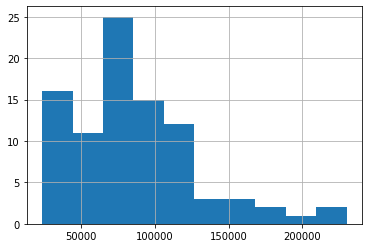

In [65]:
y_train.hist()

<AxesSubplot:>

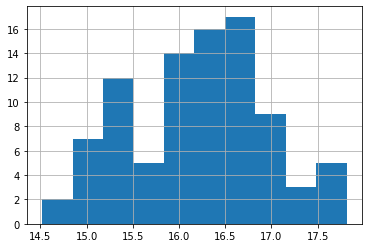

In [66]:
y_train = np.log2(y_train)
y_test = np.log2(y_test)

y_train.hist()

In [64]:
# one_hot_enconding
x_features_one = pd.get_dummies(x_features, columns=['company', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'])

In [17]:
x_features_one

,diameter,company_A,company_B,company_C,company_D,company_E,topping_beef,topping_black_papper,topping_chicken,topping_meat,...,size_large,size_medium,size_reguler,size_small,extra_sauce_no,extra_sauce_yes,extra_cheese_no,extra_cheese_yes,extra_mushrooms_no,extra_mushrooms_yes
0,22.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1,20.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,16.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3,14.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,18.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,8.5,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
125,12.0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
126,14.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
127,8.5,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1


In [18]:
x_features_one.shape

(129, 50)

In [39]:
y_target_log = np.log1p(y_target)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_features_one, y_target,
                                                    test_size=0.3, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# 책에서는 mean_absolute_error()를 MSE로 잘못 기재함. 
# MAE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [67]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[500],
    'max_depth' : [1,2,3,4], 
    'min_samples_leaf' : [1,2,3,4 ],
    'min_samples_split' : [1,2,3,4]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_reg = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_reg , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(x_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)

C:\Users\신상훈\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: could not convert string to float: 'B'

In [43]:
pred = grid_cv.predict(x_test)

In [45]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

In [46]:
evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 0.218, RMSE: 16737.134, MAE: 12561.479
